In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mixed-handling-data/titanic.csv
/kaggle/input/train-missing/train.csv
/kaggle/input/train-data/train.csv


# Missing Indicator | Random Sample Imputation | Handling Missing Data

## Random Imputation 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [3]:
df= pd.read_csv('/kaggle/input/train-data/train.csv', usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [8]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [9]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [10]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [11]:
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = \
    X_train['Age'].dropna().sample(X_train['Age_imputed'].isnull().sum()).values

X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed'] = \
    X_train['Age'].dropna().sample(X_test['Age_imputed'].isnull().sum()).values


In [12]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([29.  , 16.  , 47.  , 52.  , 21.  ,  1.  , 21.  , 24.  , 16.  ,
       48.  , 20.  , 38.  , 44.  , 26.  , 40.  , 36.  , 34.  , 17.  ,
       35.  , 16.  , 42.  , 18.  , 26.  ,  5.  , 23.  , 31.  , 32.  ,
       41.  , 28.  , 18.  , 46.  , 21.  , 28.  , 23.  , 58.  , 22.  ,
       66.  , 13.  , 45.  , 27.  , 21.  , 45.  , 43.  , 18.  , 25.  ,
       24.  ,  2.  , 17.  , 30.  , 26.  , 24.  , 36.  , 21.  , 31.  ,
       19.  , 49.  , 71.  , 25.  , 14.  , 25.  , 34.  , 34.  , 19.  ,
       10.  , 16.  , 14.  , 20.  , 32.  , 32.  , 62.  ,  9.  , 20.  ,
       44.  , 43.  , 27.  , 28.  , 33.  , 24.  , 50.  , 17.  , 22.  ,
       21.  , 34.  , 31.  , 23.  ,  9.  , 24.  , 37.  , 27.  ,  0.67,
       70.  ,  4.  , 24.  ,  4.  , 30.  , 24.  , 16.  , 22.  , 48.  ,
       28.  , 20.  , 21.  , 24.  ,  9.  , 56.  , 18.  , 39.  , 24.  ,
       47.  , 45.  , 58.  , 30.  , 38.  , 32.  , 20.  , 18.  , 32.  ,
        7.  , 17.  , 34.  , 21.  , 30.  , 24.  , 50.  , 22.  , 19.  ,
        0.75,  4.  ,

In [13]:
X_train['Age'].isnull().sum()

148

In [14]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,30.0
493,71.0,49.5042,71.0
527,NaN,221.7792,5.0


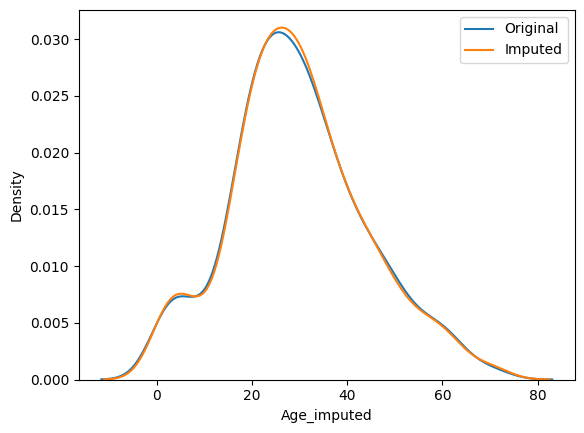

In [15]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [16]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  203.75263840432828


In [17]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,58.707684
Age,71.512440,204.349513,204.349513
Age_imputed,58.707684,204.349513,203.752638


<Axes: >

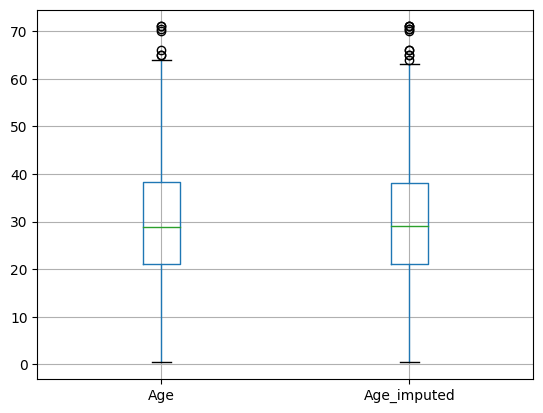

In [18]:
X_train[['Age', 'Age_imputed']].boxplot()

In [19]:
data = pd.read_csv('/kaggle/input/train-missing/train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [20]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [21]:
data.isnull().mean() *100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [22]:
X = data
y = data['SalePrice']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [25]:
X_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd
...,...,...,...,...,...
466,Po,TA,167000,TA,Po
299,Gd,TA,158500,TA,Gd
493,Fa,TA,155000,TA,Fa
527,Gd,TA,446261,TA,Gd


In [26]:
X_train.loc[X_train['GarageQual_imputed'].isnull(), ['GarageQual_imputed']]= X_train['GarageQual'].dropna().sample(X_train['GarageQual_imputed'].isnull().sum()).values

X_test.loc[X_test['GarageQual_imputed'].isnull(), ['GarageQual_imputed']]= X_train['GarageQual'].dropna().sample(X_test['GarageQual_imputed'].isnull().sum()).values

X_train.loc[X_train['FireplaceQu_imputed'].isnull(), ['FireplaceQu_imputed']]= X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu_imputed'].isnull().sum()).values

X_test.loc[X_test['FireplaceQu_imputed'].isnull(), ['FireplaceQu_imputed']]= X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu_imputed'].isnull().sum()).values

In [27]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [28]:
temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.037671
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [29]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.645342
TA,0.412439,0.542088
Fa,0.040917,0.053872
Po,0.027823,0.037037
Ex,0.024550,0.032548


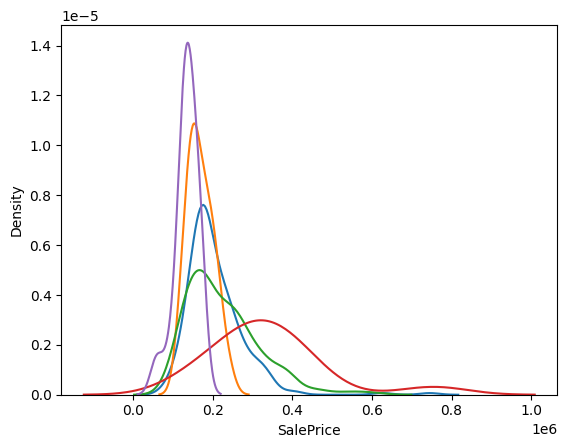

In [30]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

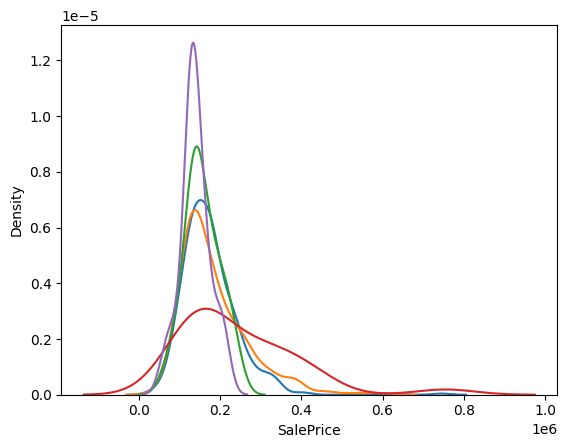

In [31]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()